In [61]:
import eli5
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import spacy
import tensorflow as tf

from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from spacy import displacy
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalMaxPooling1D, Dropout
from tensorflow.keras.datasets import imdb

In [56]:
%matplotlib inline

In [38]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xiaomi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\xiaomi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\xiaomi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(path='imdb.npz')

In [3]:
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict((value, key) for key, value in word_index.items())

def decode(review):
    text = ''
    for i in review:
        try:
            text += reverse_word_index[i]
        except:
            text +=' '
        text += ' '
    return text

In [5]:
print(decode(x_train[0]))

the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room titillate it so heart shows to years of every never going villaronga help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but pratfalls to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other tricky in of seen over landed for anyone of gilmore's br show's to whether from than out themselves history he name half some br of 'n odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but whe

In [6]:
print(f'Train size = {len(x_train)}')
print(f'Test size = {len(x_test)}')

Train size = 25000
Test size = 25000


In [7]:
unique, counts = np.unique(y_train, return_counts=True)

<BarContainer object of 2 artists>

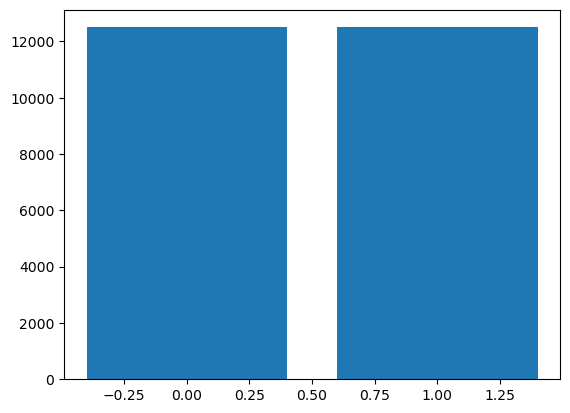

In [8]:
plt.bar(unique, counts)

In [9]:
df_train = pd.DataFrame()
df_train['text'] = [decode(text) for text in x_train]
df_train['label'] = y_train
df_train

,text,label
0,the as you with out themselves powerful lets l...,1
1,the thought solid thought senator do making to...,0
2,the as there in at by br of sure many br of pr...,0
3,the of bernadette mon they halfway of identity...,1
4,the sure themes br only acting i i was favouri...,0
...,...,...
24995,the as it is ludicrous on not rape br program ...,1
24996,the slaughter susan effects is following like ...,0
24997,the this is anything tv tormented it is genera...,0
24998,the bar reverse me we endearing was song deep ...,1


In [10]:
df_test = pd.DataFrame()
df_test['text'] = [decode(text) for text in x_test]
df_test['label'] = y_test
df_test

,text,label
0,the wonder own as by is sequence i i jars rose...,0
1,the as you world's is quite br mankind most th...,1
2,the plot near ears recent halliburton cosmopol...,1
3,the was stick did as roles br on take as my wa...,0
4,the just good because great cold watching is m...,1
...,...,...
24995,the of ending it still been of you episodes mo...,1
24996,the of muted correct in your can is describes ...,1
24997,the was woods for in why as it so an some gett...,0
24998,the this did am it of particular on that turn ...,0


In [36]:
#@title Начинаем классифицировать! { vertical-output: true, display-mode: "form" }
positive_words = 'short', 'small', 'definitely', 'supporting', 'starts' #@param {type:"raw"}
negative_words = 'sure', 'tell', 'hope', 'rest', 'death' #@param {type:"raw"}

positives_count = df_test.text.apply(lambda text: sum(word in text for word in positive_words))
negatives_count = df_test.text.apply(lambda text: sum(word in text for word in negative_words))
is_positive = positives_count > negatives_count
correct_count = (is_positive == df_test.label).sum()

accuracy = correct_count / len(df_test)

print('Test accuracy = {:.2%}'.format(accuracy))
if accuracy > 0.71:
    from IPython.display import Image, display
    display(Image('https://s3.amazonaws.com/achgen360/t/rmmoZsub.png', width=500))

Test accuracy = 57.01%


In [12]:
import re

pattern = re.compile('<br\s?\/>|<br>')

In [13]:
df_train['text'] = df_train['text'].apply(lambda text: pattern.subn(' ', text)[0])
df_test['text'] = df_test['text'].apply(lambda text: pattern.subn(' ', text)[0])

In [24]:
tokenizer = nltk.tokenize.WordPunctTokenizer()
mystopwords = stopwords.words("english") + ['the', 'a']

def remove_punktuation(text):
    return re.sub(r'[^\w\s\d]', '', text)

def lower_case(text):
    text = str(text).lower()
    return ' '.join(tokenizer.tokenize(text))

def remove_stopwords(text):
    text = tokenizer.tokenize(text)
    text = [w for w in text if w not in mystopwords]
    return ' '.join(text)
    
def normalize(text):
    text = remove_punktuation(text)
    text = lower_case(text)
    text = remove_stopwords(text)
    return text

In [25]:
df_train['text'] = df_train['text'].apply(normalize)
df_test['text'] = df_test['text'].apply(normalize)

In [26]:
def eval_model(model, df_test):
    preds = model.predict(df_test['text'])
    print('Test accuracy = {:.2%}'.format(accuracy_score(df_test['label'], preds)))

In [27]:
vectorizer = TfidfVectorizer()
classifier = LogisticRegression()

model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

model.fit(df_train['text'], df_train['label'])

eval_model(model, df_test)

Test accuracy = 87.79%


In [28]:
eli5.show_weights(classifier, vec=vectorizer, top=40)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Weight?,Feature
+6.284,shot
+5.045,small
+4.965,definitely
+4.802,supporting
+4.507,starts
+4.450,heart
+4.399,several
+4.221,much
+4.079,played
+3.908,problems


In [29]:
preds_vount_vect = model.predict(df_test['text'])

incorrect_pred_index = np.random.choice(np.where(preds_vount_vect != df_test['label'])[0])

eli5.show_prediction(classifier, 
                     df_test['text'].iloc[incorrect_pred_index],
                     vec=vectorizer, 
                     targets=['positive'], 
                     target_names=['negative', 'positive'])

##### N-граммы слов

In [30]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
classifier = LogisticRegression()

model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

model.fit(df_train['text'], df_train['label'])

eval_model(model, df_test)

Test accuracy = 87.51%


In [31]:
vectorizer = TfidfVectorizer(ngram_range=(1, 3))
classifier = LogisticRegression()

model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

model.fit(df_train['text'], df_train['label'])

eval_model(model, df_test)

Test accuracy = 86.74%


##### N-граммы символов

In [32]:
vectorizer = TfidfVectorizer(ngram_range=(2, 6), max_features=20000, analyzer='char')
classifier = LogisticRegression()

model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

model.fit(df_train['text'], df_train['label'])

eval_model(model, df_test)

Test accuracy = 84.60%


In [33]:
print('Positive' if df_test['label'].iloc[1] else 'Negative')
eli5.show_prediction(classifier, df_test['text'].iloc[1], vec=vectorizer, 
                     targets=['positive'], target_names=['negative', 'positive'])

Positive


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [34]:
vectorizer = TfidfVectorizer(ngram_range=(3, 7), analyzer='char')
classifier = LogisticRegression()

model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

model.fit(df_train['text'], df_train['label'])

eval_model(model, df_test)

Test accuracy = 86.10%


In [35]:
print('Positive' if df_test['label'].iloc[1] else 'Negative')

eli5.show_prediction(classifier, 
                     df_test['text'].iloc[1], 
                     vec=vectorizer, 
                     targets=['positive'], 
                     target_names=['negative', 'positive'])

Positive


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#### Подключаем лингвистику

In [44]:
nlp = spacy.load('en_core_web_sm', disable=['parser'])

docs = [doc for doc in nlp.pipe(df_train.text.values[:50])]

In [45]:
for token in docs[0]:
    print(token.text, token.lemma_, token.ent_iob_, token.ent_type_)

powerful powerful O 
lets let O 
loves love O 
becomes become O 
reaching reach O 
journalist journalist O 
lot lot O 
anyone anyone O 
atmosphere atmosphere O 
never never O 
room room O 
titillate titillate O 
heart heart O 
shows show O 
years year B DATE
every every O 
never never O 
going go O 
villaronga villaronga O 
help help O 
moments moment O 
every every O 
chest chest O 
visual visual O 
movie movie O 
except except O 
several several O 
enough enough O 
current current O 
film film O 
mine mine O 
potentially potentially O 
unfortunately unfortunately O 
get get O 
camp camp O 
movie movie O 
sometimes sometimes O 
movie movie O 
scary scary O 
pratfalls pratfall O 
story story O 
wonderful wonderful O 
seeing see O 
character character O 
70s 70 B DATE
musicians musician O 
heart heart O 
shadows shadow O 
serious serious O 
critics critic O 
is be O 
nt not O 
one one B CARDINAL
tricky tricky O 
seen see O 
landed land O 
anyone anyone O 
gilmores gilmore O 
br br O 
sh

In [46]:
lemmatizer = WordNetLemmatizer()

In [47]:
def lemmatized_words(text):
    text_lem = [lemmatizer.lemmatize(word) for word in tokenizer.tokenize(text)]
    return ' '.join(word for word in text_lem)

In [48]:
df_train['lemmatized'] = df_train['text'].apply(lemmatized_words)
df_test['lemmatized'] = df_test['text'].apply(lemmatized_words)

In [49]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
classifier = LogisticRegression()

model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

model.fit(df_train['lemmatized'], df_train['label'])

eval_model(model, df_test)

Test accuracy = 86.71%


In [51]:
stemmer = PorterStemmer()

In [52]:
def stemmed_words(text):
    text_stem = [stemmer.stem(word) for word in tokenizer.tokenize(text)]
    return ' '.join(word for word in text_stem)

In [53]:
df_train['stemmed'] = df_train['text'].apply(stemmed_words)
df_test['stemmed'] = df_test['text'].apply(stemmed_words)

In [54]:
model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

model.fit(df_train['stemmed'], df_train['label'])

eval_model(model, df_test)

Test accuracy = 82.33%


#### Включаем дип лёрнинг

In [55]:
df_train['text']

0        powerful lets loves becomes reaching journalis...
1        thought solid thought senator making spot nomi...
2        br sure many br proving women doesnt never hat...
3        bernadette mon halfway identity went plot acto...
4        sure themes br acting favourite hat already sc...
                               ...                        
24995    ludicrous rape br program glimpse im honestly ...
24996    slaughter susan effects following like people ...
24997    anything tv tormented generally oh legitimates...
24998    bar reverse endearing song deep experience wri...
24999    movie thought completely br ive character ever...
Name: text, Length: 25000, dtype: object

<BarContainer object of 252 artists>

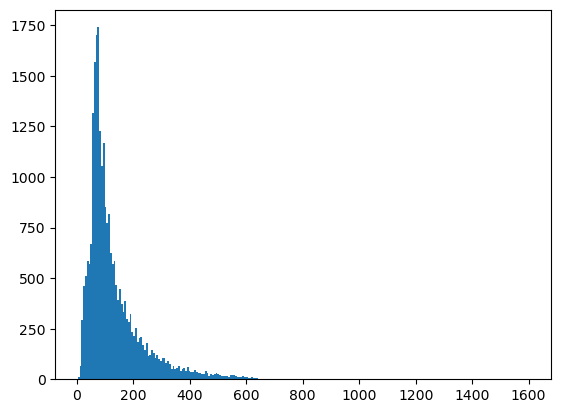

In [57]:
_, _, hist = plt.hist(df_train.text.apply(lambda text: len(text.split())), bins='auto')
hist

In [59]:
words_counter = Counter((word for text in df_train.text for word in text.lower().split()))

word2idx = {
    '': 0,
    '<unk>': 1
}
for word, count in words_counter.most_common():
    if count < 10:
        break
        
    word2idx[word] = len(word2idx)
    
print('Words count', len(word2idx))

Words count 20285


In [60]:
def convert(texts, word2idx, max_text_len):
    data = np.zeros((len(texts), max_text_len), dtype=np.int)
    
    for inx, text in enumerate(texts):
        result = []
        for word in text.split():
            if word in word2idx:
                result.append(word2idx[word])
        padding = [0]*(max_text_len - len(result))
        data[inx] = np.array(padding + result[-max_text_len:], dtype=np.int)
    return data

X_train = convert(df_train.text, word2idx, 700)
X_test = convert(df_test.text, word2idx, 700)

C:\Users\xiaomi\AppData\Local\Temp\ipykernel_15856\3764440180.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data = np.zeros((len(texts), max_text_len), dtype=np.int)
C:\Users\xiaomi\AppData\Local\Temp\ipykernel_15856\3764440180.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current us

In [65]:
model = Sequential([
    Embedding(input_dim=len(word2idx), output_dim=64, input_shape=(X_train.shape[1],)),
    GlobalMaxPooling1D(),
    Dense(units=10, activation='relu'),
    Dense(units=10, activation='relu'),
    
    Dense(units=1, activation='sigmoid')
])

model.summary()
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 700, 64)           1298240   
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,299,011
Trainable params: 1,299,011
Non-trainable params: 0
____________________________________________

In [66]:
model.fit(X_train, 
          df_train.label, 
          batch_size=128, 
          epochs=3, 
          validation_data=(X_test, df_test.label))

Epoch 1/3
196/196 [==============================] - 13s 61ms/step - loss: 0.6026 - accuracy: 0.6844 - val_loss: 0.4480 - val_accuracy: 0.8457
Epoch 2/3
196/196 [==============================] - 12s 59ms/step - loss: 0.3106 - accuracy: 0.8904 - val_loss: 0.3019 - val_accuracy: 0.8748
Epoch 3/3
196/196 [==============================] - 10s 50ms/step - loss: 0.1792 - accuracy: 0.9382 - val_loss: 0.3073 - val_accuracy: 0.8729


In [68]:
model.evaluate(X_test, df_test.label)[1]

782/782 [==============================] - 8s 10ms/step - loss: 0.3073 - accuracy: 0.8729


0.8728799819946289

In [69]:
X_train = convert(df_train.lemmatized, word2idx, 700)
X_test = convert(df_test.lemmatized, word2idx, 700)

C:\Users\xiaomi\AppData\Local\Temp\ipykernel_15856\3764440180.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data = np.zeros((len(texts), max_text_len), dtype=np.int)
C:\Users\xiaomi\AppData\Local\Temp\ipykernel_15856\3764440180.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current us

In [70]:
model.fit(X_train, 
          df_train.label, 
          batch_size=128, 
          epochs=3, 
          validation_data=(X_test, df_test.label))

Epoch 1/3
196/196 [==============================] - 10s 51ms/step - loss: 0.1591 - accuracy: 0.9434 - val_loss: 0.3524 - val_accuracy: 0.8552
Epoch 2/3
196/196 [==============================] - 11s 54ms/step - loss: 0.0815 - accuracy: 0.9781 - val_loss: 0.3995 - val_accuracy: 0.8493
Epoch 3/3
196/196 [==============================] - 10s 53ms/step - loss: 0.0397 - accuracy: 0.9931 - val_loss: 0.4493 - val_accuracy: 0.8483


In [71]:
X_train = convert(df_train.stemmed, word2idx, 700)
X_test = convert(df_test.stemmed, word2idx, 700)

C:\Users\xiaomi\AppData\Local\Temp\ipykernel_15856\3764440180.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data = np.zeros((len(texts), max_text_len), dtype=np.int)
C:\Users\xiaomi\AppData\Local\Temp\ipykernel_15856\3764440180.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current us

In [72]:
model.fit(X_train, 
          df_train.label, 
          batch_size=128, 
          epochs=3, 
          validation_data=(X_test, df_test.label))

Epoch 1/3
196/196 [==============================] - 12s 60ms/step - loss: 0.2983 - accuracy: 0.8777 - val_loss: 0.4918 - val_accuracy: 0.7983
Epoch 2/3
196/196 [==============================] - 12s 63ms/step - loss: 0.1604 - accuracy: 0.9440 - val_loss: 0.5268 - val_accuracy: 0.7989
Epoch 3/3
196/196 [==============================] - 11s 56ms/step - loss: 0.1009 - accuracy: 0.9691 - val_loss: 0.6419 - val_accuracy: 0.7868
